<center>

# Cost-sensitive Credit Risk Classification

### Data Mining, Machine Learning and Deep Learning
<center>

# Table of Contents
1. [Data Exploration](#1-data-exploration)
2. [Data Preprocessing](#2-data-preprocessing)
3. [Modelling](#3-modelling)

    a. [Random Forest](#3a)

    b. [Neural Network](#3b)

    c. [Logistic Regression](#3c)
    
    d. [Support Vector Machine](#3d)

4.  [Model Tuning](#4)

    a. [Random Forest](#4a)

    b. [Neural Network](#4b)

    c. [Logistic Regression](#4c)
    
    d. [Support Vector Machine](#4d)

5.  [Voting Threshold Machine (VTM)](#5)


In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras_tuner.tuners import RandomSearch
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve
#from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import LinearSVC
from IPython.display import clear_output

# Personal imports
import helpers as hlp
from helpers import evaluate

<a id='1'></a>
## 1. Data Exploration

In [36]:
df = pd.read_csv("data/heloc_dataset_v1.csv")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [38]:
# Getting basic statistical details
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


Three 'describing' values: 
- `-9` No Bureau Record or No Investigation 
- `-8` No Usable/Valid Trades or Inquires 
- `-7` Condition not Met
We can see that -9 is the lowest number of every column.

There are potential outliers, since max value often exceds the 75 percentlie

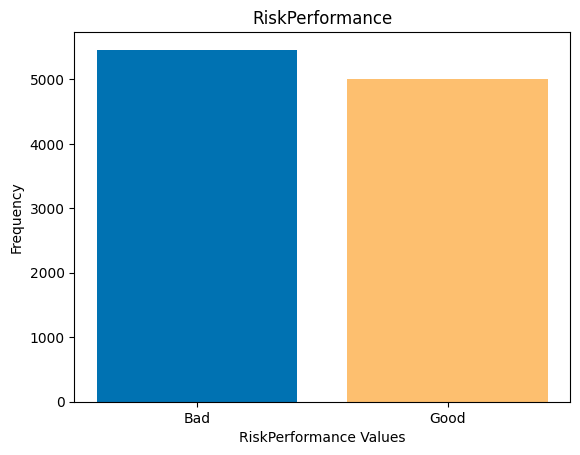

In [39]:
hlp.BarPlot(df['RiskPerformance'])

We can see that there is a good balance between Good and Bad, with 47.% Good and 52.2% Bad. 

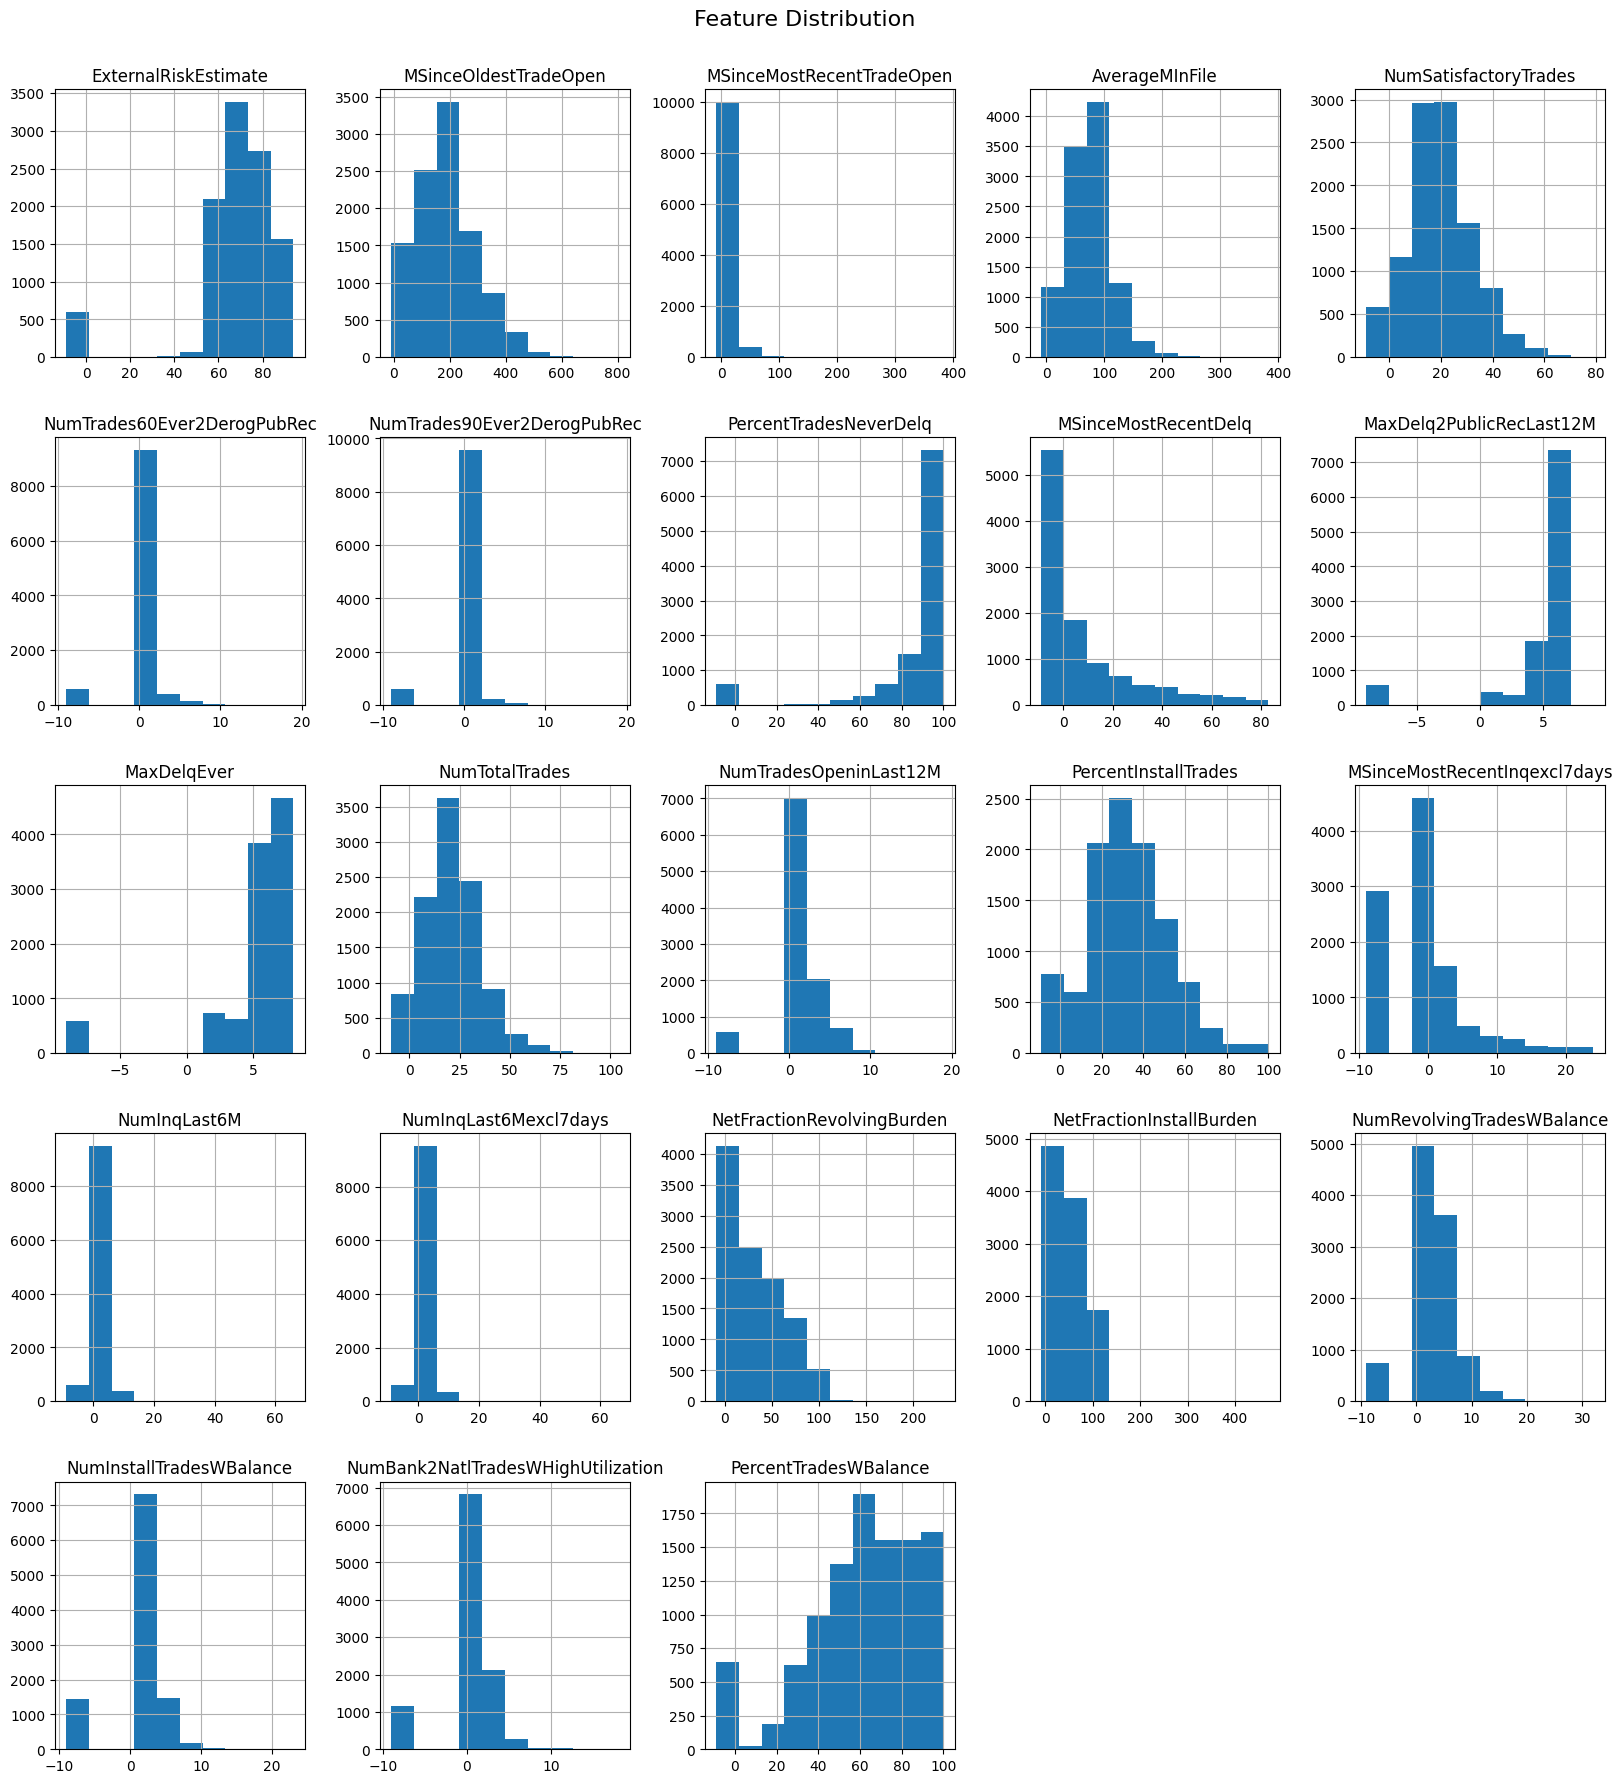

In [40]:
# Distribution with historgrams 
df.hist(bins=10, figsize=(20,20))

plt.suptitle('Feature Distribution', fontsize = 16)
plt.subplots_adjust(top = 0.94)

plt.show()

<a id='2'></a>
# 2. Data Preprocessing

In [41]:
# Label Encoder for 'RiskPerformance'
label = LabelEncoder()
df['RiskPerformance'] = label.fit_transform(df['RiskPerformance'])

In [42]:
#Detecting outliers
def detect_outliers(df):
    fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(25,10))
    fig.suptitle('Boxplots of all columns', fontsize=20)

    outliers = set()
    for i, col in enumerate(df.columns):
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        column_outliers = set(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
        outliers = outliers.union(column_outliers)
        
        # Plot boxplot in corresponding subplot
        ax = axes[i // 6][i % 6]
        ax.boxplot(df[col])
        ax.set_title(col)
        ax.scatter(list(column_outliers), df[col][list(column_outliers)], color='r')
    return outliers

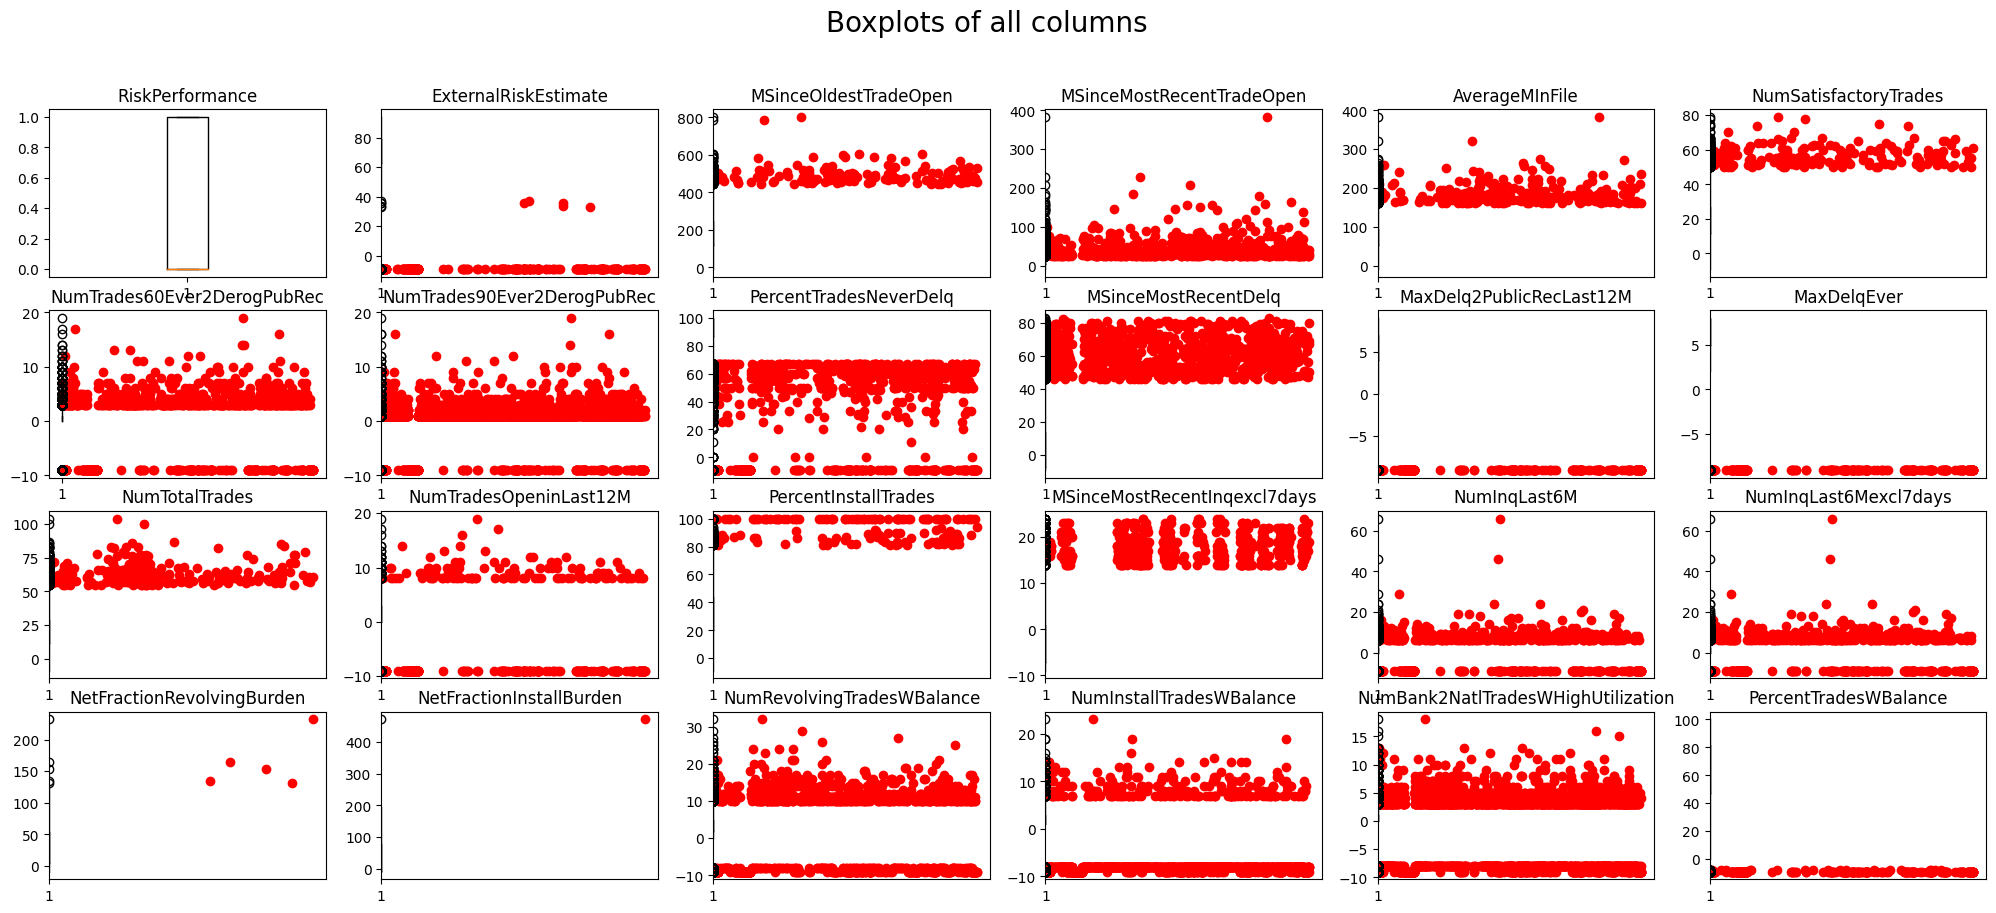

In [43]:
# Only works after label encoder
outliers = detect_outliers(df)
plt.show()

The red dots indicates wheter there are outliers for the given variable. It seems to be alot of outliers, but this is not the best indications. Due to the desribing minus values, as mentioned earlier, alot of outliers are detected for every column. But we do see that there are possibly some outliers for columns like: 
- `NetFractionRevolvingBurden`
- `NetFractionInstallBurden`
- `MSinceMostRecentTradeOpen` 
- `NumInqLast6M`

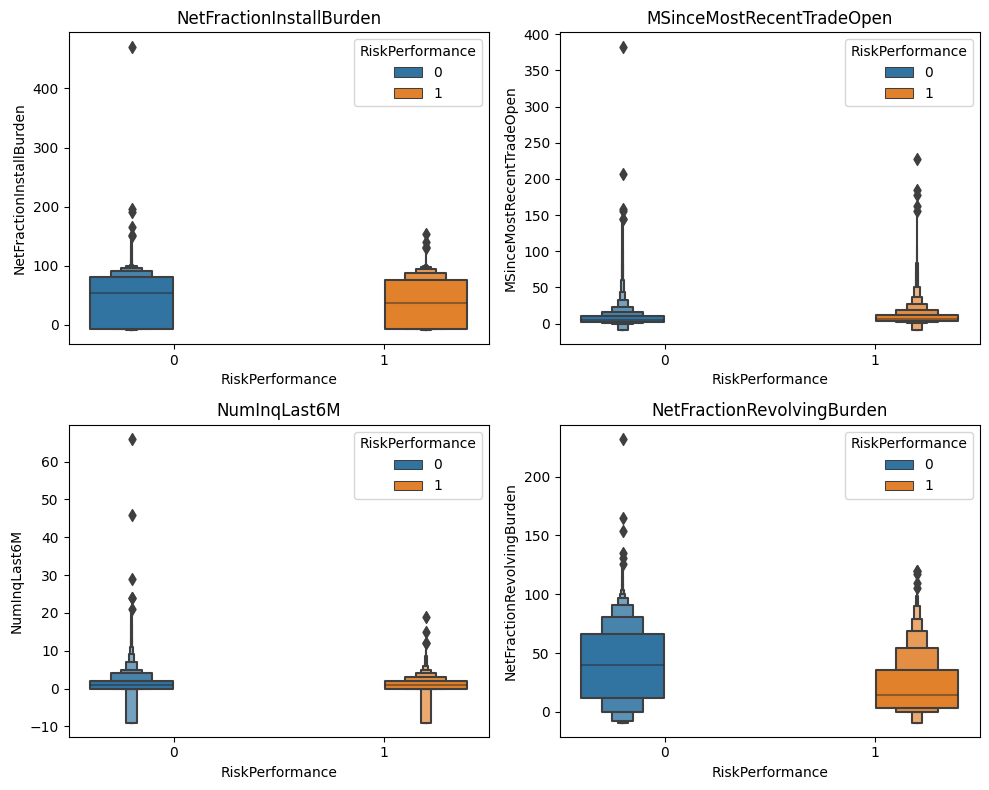

In [44]:
# Plotting the mentioned columns

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the first boxplot
sns.boxenplot(x='RiskPerformance', y='NetFractionInstallBurden', hue='RiskPerformance', data=df, ax=axes[0, 0])
axes[0, 0].set_title('NetFractionInstallBurden')

# Plot the second boxplot
sns.boxenplot(x='RiskPerformance', y='MSinceMostRecentTradeOpen', hue='RiskPerformance', data=df, ax=axes[0, 1])
axes[0, 1].set_title('MSinceMostRecentTradeOpen')

# Plot the third boxplot
sns.boxenplot(x='RiskPerformance', y='NumInqLast6M', hue='RiskPerformance', data=df, ax=axes[1, 0])
axes[1, 0].set_title('NumInqLast6M')

# Plot the fourth boxplot
sns.boxenplot(x='RiskPerformance', y='NetFractionRevolvingBurden', hue='RiskPerformance', data=df, ax=axes[1, 1])
axes[1, 1].set_title('NetFractionRevolvingBurden')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [45]:
# Replacing Outliers with Null values
for x in ['NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'MSinceMostRecentTradeOpen', 'NumInqLast6M']: 
    Q3, Q1 = np.percentile(df.loc[:,x], [75,25])
    IQR = Q3 - Q1

    Max = Q3+(1.5*IQR)
    Min = Q1-(1.5*IQR)

    # Data points thats outside of min or max bound with a NULL value 
    df.loc[df[x] < Min,x] = np.nan
    df.loc[df[x] > Max,x] = np.nan

# Dropping the null values
df.dropna(axis = 0, inplace = True)

In [46]:
# Extracting feature variables and target column
y = df.loc[:,'RiskPerformance']
X = df.drop(['RiskPerformance'], axis = 1)

# Scaling 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [47]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id='3'></a>
# 3. Modelling with cost sensitivity

### Assuming the cost matrix

In [48]:
#false positive = -3000
#true positive = 1000
cost_matrix = np.array([[0, -3000], 
                        [0, 1000]])

#take the cost of false positive and false negative
cost_ratio = cost_matrix[1,1]/-cost_matrix[0,1]

class_weights = {0: 1.0, 1: cost_ratio}

<a id='3a'></a>
## Random Forest

Random Forest
Ratio of true positive to false positive: 7.59

 Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.96      0.74       893
           1       0.88      0.35      0.50       852

    accuracy                           0.66      1745
   macro avg       0.74      0.65      0.62      1745
weighted avg       0.74      0.66      0.62      1745

 Confusion Matrix:


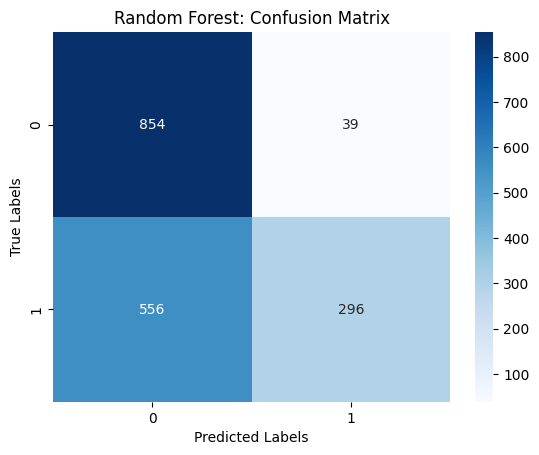

In [49]:
rf_cs = RandomForestClassifier(n_estimators=50, max_leaf_nodes=30, random_state=9, class_weight=class_weights)

rf_cs.fit(X_train, y_train)
y_pred_rf = rf_cs.predict(X_test)

# Evaluate 
evaluate(y_test, y_pred_rf, "Random Forest")

<a id='3c'></a>
## Logistic Regression

Logistic Regression with Cost Matrix
Ratio of true positive to false positive: 6.72

 Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.95      0.74       893
           1       0.87      0.36      0.51       852

    accuracy                           0.66      1745
   macro avg       0.74      0.66      0.63      1745
weighted avg       0.74      0.66      0.63      1745

 Confusion Matrix:


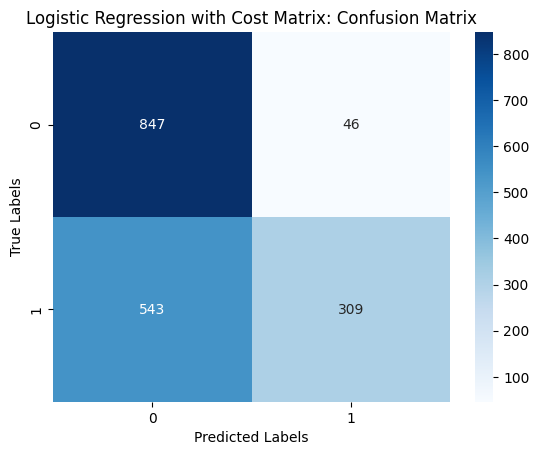

In [63]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
lr_cs = LogisticRegression(class_weight=class_weights, random_state=42)

# Train the model
lr_cs.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_cs.predict(X_test)

evaluate(y_test, y_pred, "Logistic Regression with Cost Matrix")


<a id='3d'></a>
## SVM

SVM with Cost Matrix
Ratio of true positive to false positive: 6.62

 Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.96      0.73       893
           1       0.87      0.30      0.45       852

    accuracy                           0.64      1745
   macro avg       0.73      0.63      0.59      1745
weighted avg       0.73      0.64      0.59      1745

 Confusion Matrix:


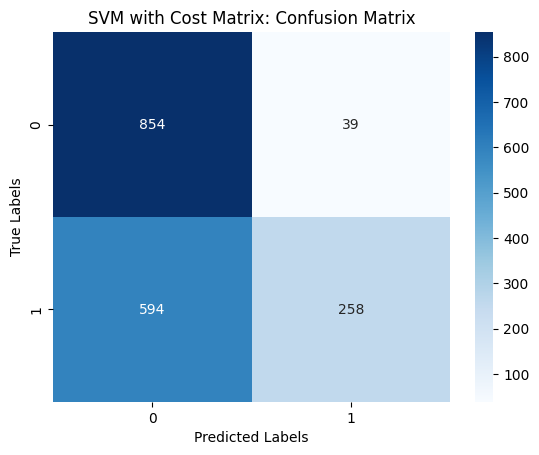

In [64]:
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

svm_cs = LinearSVC(max_iter=1000000, class_weight=class_weights)

# fit the model
svm_cs.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_cs.predict(X_test)

evaluate(y_test, y_pred, "SVM with Cost Matrix")


## Neural Network

55/55 [==============================] - 0s 495us/step
Neural Network
Ratio of true positive to false positive: 2.62

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.73       893
           1       0.72      0.71      0.71       852

    accuracy                           0.72      1745
   macro avg       0.72      0.72      0.72      1745
weighted avg       0.72      0.72      0.72      1745

 Confusion Matrix:


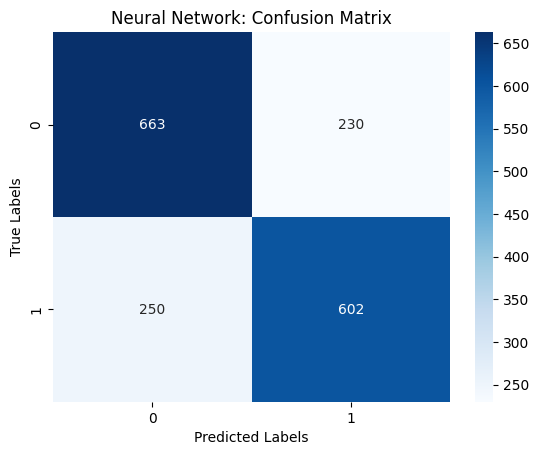

In [52]:
# Simple Neural Network
NN_simple_model = Sequential()
NN_simple_model.add(Dense(160, activation='relu', input_shape=(X_train.shape[1],)))
NN_simple_model.add(Dropout(0.3))
NN_simple_model.add(Dense(160, activation='relu'))
NN_simple_model.add(Dropout(0.2))
NN_simple_model.add(Dense(160, activation='relu'))
NN_simple_model.add(Dropout(0.3))
NN_simple_model.add(Dense(1, activation='sigmoid'))

# Compile the model
NN_simple_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=["accuracy"])

# Train the model
NN_simple_model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)

# Predict with the model
y_pred_nn = (NN_simple_model.predict(X_test) > 0.5).astype("int32")

evaluate(y_test, y_pred_nn, "Neural Network")

<a id='5'></a>
# Voting Threshold Machine

Models are set with parameters from previous gridsearch to approximate best performance. They are later tuned for each cost ratio by dynamically applying class weights to their training.

### NN for VTM

In [53]:
from keras.metrics import Precision
    
def nn_vtm_trainer(class_weights):
    
    # Simple Neural Network
    NN_simple_model = Sequential()
    NN_simple_model.add(Dense(160, activation='relu', input_shape=(X_train.shape[1],)))
    NN_simple_model.add(Dropout(0.3))
    NN_simple_model.add(Dense(160, activation='relu'))
    NN_simple_model.add(Dropout(0.2))
    NN_simple_model.add(Dense(160, activation='relu'))
    NN_simple_model.add(Dropout(0.3))
    NN_simple_model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    NN_simple_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=[Precision()])
    # Train the model
    NN_simple_model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0, class_weight=class_weights)
    
    return NN_simple_model

### SVM for VTM

In [54]:
def svm_vtm_trainer(class_weights):
    
    # Create and fit the SVM model
    svm_model_cs = svm.SVC(class_weight=class_weights)
    svm_model_cs.fit(X_train, y_train)
    
    return svm_model_cs

### LogReg for VTM

In [55]:
def lr_vtm_trainer(class_weights):
    
    # Instantiate the model
    lr_cs = LogisticRegression(class_weight=class_weights, random_state=420)

    # Train the model
    lr_cs.fit(X_train, y_train)
    
    return lr_cs

### RF for VTM

In [56]:
def rf_vtm_trainer(class_weights):
    
    # Random Forest Classifier
    rf_cs = RandomForestClassifier(n_estimators=30, max_leaf_nodes=20, random_state=9, class_weight=class_weights)
    rf_cs.fit(X_train, y_train)
    
    return rf_cs

### Function that uses multiple models to vote on the classification of a sample

In [57]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Function that uses multiple models to vote on the classification of a sample
def model_probabilities(models, sample, threshold):

    model_votes = []  # List to store the probabilities from models that voted

    # Iterate over each model
    for model in models:
        # Check if the model has a "predict_proba" method
        if hasattr(model, "predict_proba"):
            probabilities = model.predict_proba(sample)  # Get predicted probabilities
            # because different models return differnet shapes of theit probabilities output we need to check the shape
            # If probabilities is a 1D array
            if probabilities.ndim == 1:
                predicted_probability = probabilities[1]  # Assume binary classification
            else:  # If probabilities is a 2D array ( in the case for LogisticRegression)
                predicted_probability = probabilities[0, 1]  # Assume binary classification

        # Check if the model has a "decision_function" method
        elif hasattr(model, "decision_function"):
            predicted_score = model.decision_function(sample)  # Get decision function score
            predicted_probability = sigmoid(predicted_score)  # Apply sigmoid function to convert score to a probability
            # If predicted_probability is a 1D array
            if predicted_probability.ndim == 1 and len(predicted_probability) == 1:
                predicted_probability = predicted_probability[0]  # Convert to scalar
            elif predicted_probability.ndim > 1:
                predicted_probability = predicted_probability[0, 1]  # Assume binary classification
        else:
        # If the model has an output_shape attribute with more than one dimension and the second dimension is 1
            if len(model.output_shape) > 1 and model.output_shape[1] == 1:
                predicted_probabilities = model(sample, training=False)  # Get predicted probabilities using direct call
                predicted_probability = predicted_probabilities[0, 0]  # Assume binary classification
            else:  # If the model doesn't have an output_shape attribute with more than one dimension and the second dimension is 1
                predicted_probabilities = model(sample, training=False)  # Get predicted probabilities using direct call
                predicted_probability = predicted_probabilities[0, 1]  # Assume binary classification


        model_votes.append((model, predicted_probability))  # Add the model and its predicted probability to the list of model votes
    
    return model_votes  # Return the prediction and the votes of the models that voted

### Voting algorithm variations

In [58]:
# Voting algorithm 1
def actual_voting_algo1(model_probs, threshold,ratio):
    # Initialize a counter for models with prediction probability above threshold
    count = 0

    # Loop over the model votes
    for model, predicted_probability in model_probs:
        # If the predicted probability is greater than the threshold
        if predicted_probability > threshold:
            # Increment the counter
            count += 1

    # If two or more models have a prediction probability higher than the threshold
    if count >= 2:
        return 1
    else:
        return 0


In [59]:
# Voting algorithm 2
def actual_voting_algo2(model_probs, threshold,ratio):
    
    if ratio > 6:
        ratio_adjusted = 0.6
    elif ratio > 3:
        ratio_adjusted = 0.7
    else:
        ratio_adjusted = 1
    
    # Initialize a counter for the sum of weighted votes
    weighted_votes = 0
    # Loop over the model votes
    for model, predicted_probability in model_probs:
        # Add the weighted vote to the counter
        weighted_votes += predicted_probability

    # If the sum of weighted votes is greater than the threshold times the number of models
    if weighted_votes > (threshold * len(model_probs))*ratio_adjusted:
        return 1
    else:
        return 0

The second algorithm introduces a weighted voting system, where each model's vote is weighted by its prediction probability. The final decision is made based on the sum of these weighted votes.


### Functions for expected profit for each voting algorithm

In [60]:
def calculate_profit_algo(TP, FP, profit_TP_algo, loss_FP):

    # Calculate the profit
    profit = TP * profit_TP_algo - FP * loss_FP
    
    return profit

def voting_algo_expected_profit(models, actual_voting_algo, size, profit_TP_algo, loss_FP, X_test, y_test, threshold):
    
    random_indices = np.random.choice(X_test.shape[0], size=size, replace=False)
    random_examples = X_test[random_indices]
    actual_classes = y_test.iloc[random_indices.tolist()]

    # Initialize counters
    TP = 0 # True positives counter 
    FP = 0 # False positives counter 
    TN = 0 # True negatives counter
    FN = 0 # False negatives counter

    possible_profit = 0 # Counter for possible profit
    actual_profit = 0 # Counter for actual profit
    
    ratio = (loss_FP/profit_TP_algo*0.7) # Retrieve ratio for adjusting the voting_algo
    
    # Apply the voting function to each random example
    for i, example in enumerate(random_examples):
        model_probs = model_probabilities(models, example.reshape(1, -1), threshold)
        prediction = actual_voting_algo(model_probs, threshold, ratio) ##### call to voting_algo

        # Update the counters
        # If the prediction is correct and the actual class is 1 (loan is good) then increment TP by 1 
        if prediction == 1 and actual_classes.iloc[i] == 1:
            TP += 1
        # If the prediction is incorrect (loan is bad) and the actual class is 0 then increment FP by 1
        elif prediction == 1 and actual_classes.iloc[i] == 0:
            FP += 1

        # If the prediction is correct and the actual class is 0 (loan is bad) then increment TN by 1
        if prediction == 0 and actual_classes.iloc[i] == 0:
            TN += 1
        elif prediction == 0 and actual_classes.iloc[i] == 1:
            FN += 1
        

        # If the actual class is 1 (loan is good) then increment possible_profit by potential profit
        if actual_classes.iloc[i] == 1:
            possible_profit += profit_TP_algo

    actual_profit = calculate_profit_algo(TP, FP, profit_TP_algo, loss_FP)

    return actual_profit, possible_profit, TP, FP, TN, FN


### Function for best threshold for each algorithm

In [61]:
def algo_grid_threshold(models,actual_voting_algo,size, profit_TP_algo, loss_FP, X_test, y_test, start, stop, step):
    best_threshold = 0 
    best_profit = 0
    possible_profit = 0
    best_TP = 0
    best_FP = 0
    
    # Test various thresholds
    for threshold in np.arange(start, stop, step):
        actual_profit, possible_profit_temp, TP, FP, TN, FN = voting_algo_expected_profit(models, actual_voting_algo, size, profit_TP_algo, loss_FP, X_test, y_test, threshold)

        if actual_profit > best_profit:
            best_profit = actual_profit
            possible_profit = possible_profit_temp
            best_threshold = threshold
            best_TP = TP
            best_FP = FP

    return best_threshold, best_profit, best_TP, best_FP

### Individual model threshold grid search

In [62]:
def threshold_gridsearch(model, size, profit_TP_algo, loss_FP, X_test, y_test, start, stop, step): #specifcatiosn removed from last 3
    best_threshold = 0
    best_profit = 0
    best_TP = 0
    best_FP = 0
    
    # Test various thresholds
    for threshold in np.arange(start, stop, step):
        actual_profit, _, TP, FP = model_expected_profit(model, size, profit_TP_algo, loss_FP, X_test, y_test, threshold)
        if actual_profit > best_profit:
            best_profit = actual_profit
            best_threshold = threshold
            best_TP = TP
            best_FP = FP
            
    return best_threshold, best_profit, best_TP, best_FP

def model_expected_profit(model, size, profit_TP_algo, loss_FP, X_test, y_test, threshold=0.5):
    random_indices = np.random.choice(X_test.shape[0], size=size, replace=False)
    random_examples = X_test[random_indices]
    actual_classes = y_test.iloc[random_indices.tolist()]

    TP = 0 # True positives counter 
    FP = 0 # False positives counter 
    possible_profit = 0 # Counter for possible profit
    actual_profit = 0 # Counter for actual profit

    for i, example in enumerate(random_examples):
        if isinstance(model, Sequential):  # Check if the model is a Keras Sequential model
            probabilities = model.predict(example.reshape(1, -1),verbose = 0)
            prediction = 1 if probabilities > threshold else 0
        elif hasattr(model, "predict_proba"):
            probabilities = model.predict_proba(example.reshape(1, -1))
            prediction = 1 if probabilities[0, 1] > threshold else 0
        else:
            prediction = model.predict(example.reshape(1, -1))
            
        if prediction == 1 and actual_classes.iloc[i] == 1:
            TP += 1
        elif prediction == 1 and actual_classes.iloc[i] == 0:
            FP += 1

        if actual_classes.iloc[i] == 1:
            possible_profit += profit_TP_algo

    actual_profit = calculate_profit_algo(TP, FP, profit_TP_algo, loss_FP)

    return actual_profit, possible_profit, TP, FP

# Gridsearch for best voting algorithm for each cost ratio

In [33]:
def voting_algo_grid(voting_algo_list, X_test, y_test, profit_TP_algo, loss_FP_list, size, start=0.3, stop=0.7, step=0.1):
    trainers = [('RF', rf_vtm_trainer), ('LR', lr_vtm_trainer),('NN', nn_vtm_trainer), ('SVM', svm_vtm_trainer)]
    results_dict = {}

    for loss_FP in loss_FP_list:
        models = []
        
        class_weights = {0: 1.0, 1: profit_TP_algo/loss_FP} # Calculate the weights to send to the trainers
        
        ratio = (str(loss_FP/1000) + " to " + str(profit_TP_algo/1000))
        
        results_df = pd.DataFrame(columns=['Ratio', 'Model', 'Threshold', 'Profit', 'TP', 'FP'])  # Initiate a new DataFrame for each ratio
        for model_name, trainer in trainers:
            model = trainer(class_weights)
            models.append(model)
            best_threshold, best_profit, best_TP, best_FP = threshold_gridsearch(model, size, profit_TP_algo, loss_FP, X_test, y_test, start, stop, step)
            results_df = pd.concat([results_df, pd.DataFrame([{
                'Ratio': ratio,
                'Model': model_name,
                'Threshold': best_threshold,
                'Profit': best_profit,
                'TP': best_TP,
                'FP': best_FP
            }], index=[0])], ignore_index=True)

        best_profit = 0
        best_algo = 0 
        best_threshold = 0 
        best_TP = 0
        best_FP = 0
        voting_algo_nr = 0

        print(f"Finding best voting algorithm for the ratio of {ratio}...")

        for algo in voting_algo_list:
            voting_algo_nr += 1
            name = "VTM"+str(voting_algo_nr)
            threshold, profit, TP, FP = algo_grid_threshold(models, algo, size, profit_TP_algo, loss_FP, X_test, y_test, start, stop, step)
            if best_profit < profit:
                best_profit = profit
                best_algo = voting_algo_nr
                best_threshold = threshold
                best_TP = TP
                best_FP = FP

            results_df = pd.concat([results_df, pd.DataFrame([{
                'Ratio': ratio,
                'Model': name,
                'Threshold': best_threshold,
                'Profit': best_profit,
                'TP': best_TP,
                'FP': best_FP
            }], index=[0])], ignore_index=True)
  
        print(results_df)  

        results_dict[f'ratio_{ratio}'] = results_df  # Store the DataFrame in the dictionary

    return results_dict


## Performing the Grid Search

In [ ]:
# Setting up the parameters 
voting_algo_list = [actual_voting_algo1, actual_voting_algo2]
profit_TP_algo = 1000 # profit for True Positive
loss_FP_list = [3000,5000,10000] # loss for False Positive
size = 1745
                    
# Running the search and storing it in a dict
results_dict = voting_algo_grid(voting_algo_list, X_test, y_test, profit_TP_algo, loss_FP_list, size)

### Adding metrics to dicts

In [ ]:
def calculate_metrics(results_dict):
    for key, df in results_dict.items():
        df['TPFP_Ratio'] = df['TP'] / df['FP'].replace(0, np.nan)  # Replace 0 with NaN to avoid division by zero
        df['TPFP_Ratio'] = df['TPFP_Ratio'].apply(lambda x: round(x, 2) if np.isfinite(x) else x)  # Round if not NaN
        df['Precision'] = df['TP'] / (df['FP'] + df['TP']).replace(0, np.nan)  # Replace 0 with NaN to avoid division by zero
        df['Precision'] = df['Precision'].apply(lambda x: round(x, 2) if np.isfinite(x) else x)  # Round if not NaN
    return results_dict

In [ ]:
# Add metrics and show a single df from the dict
results_dict = calculate_metrics(results_dict)
list(results_dict.values())[0]